# Ridge(L2 Regression) , Lasso(L1 Regression) & ElasticNet

## Ridge Regression 

Ridge Regression uses L2 regularization, which adds a penalty equal to the square of the magnitude of coefficients to the loss function. This means that while Ridge regression shrinks the coefficients towards zero, it does not set any coefficients exactly to zero, thus retaining all predictors in the model.

## Lasso Regression

Lasso Regression employs L1 regularization, which adds a penalty equal to the absolute value of the coefficients. This characteristic allows Lasso to set some coefficients exactly to zero, effectively performing feature selection and simplifying the model by excluding less important predictors.

In [593]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [594]:
df=pd.read_csv("auto-mpg.csv")

In [595]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [596]:
##Here we don't need car name so removing car name column
df=df.drop('car name',axis=1)

In [597]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [598]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [599]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

In [600]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [601]:
df=df.replace('?',np.nan)

In [602]:
df=df.apply(lambda x: x.fillna(x.median()),axis=0)

In [603]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


### Separate independent and dependent variables

In [604]:
X=df.drop('mpg',axis=1)
y=df['mpg']

In [605]:
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,82,1
394,4,97.0,52,2130,24.6,82,2
395,4,135.0,84,2295,11.6,82,1
396,4,120.0,79,2625,18.6,82,1


In [606]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

### Distribution of Independent Variables

C:\Users\rajes\AppData\Local\Temp\ipykernel_11144\3543776772.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[i])
C:\Users\rajes\AppData\Local\Temp\ipykernel_11144\3543776772.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[i])
C:\Users\rajes\AppData\Local\Temp\ipykernel_11144\35437767

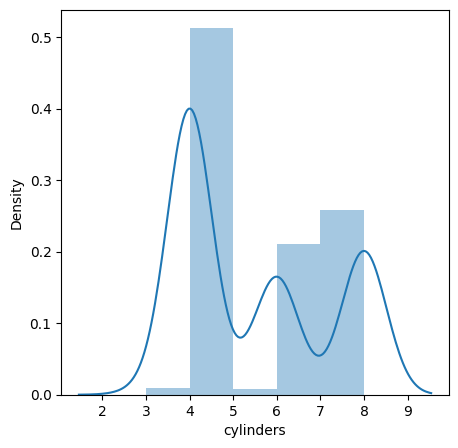

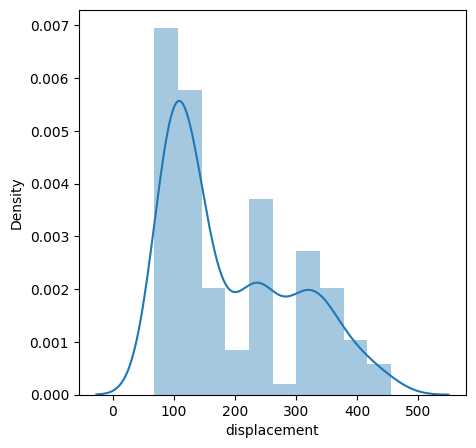

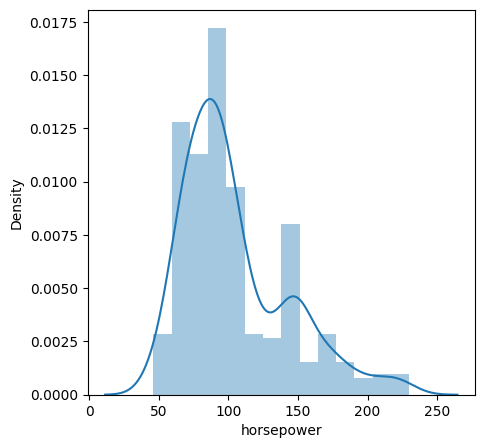

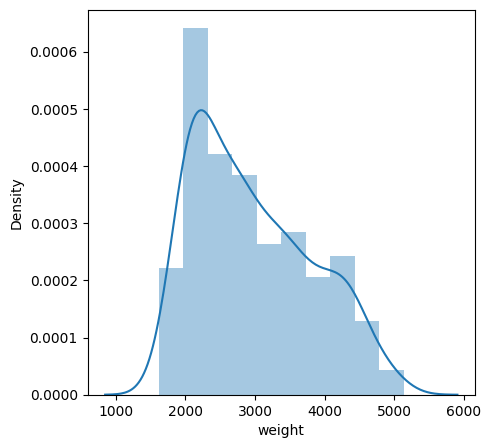

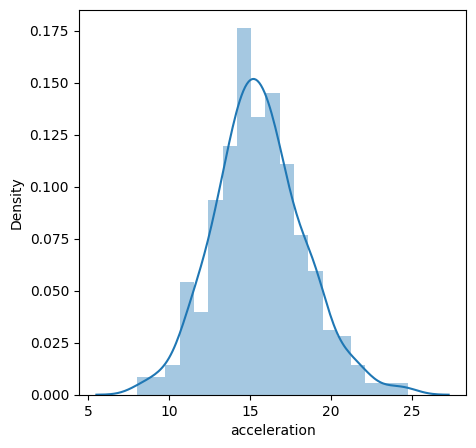

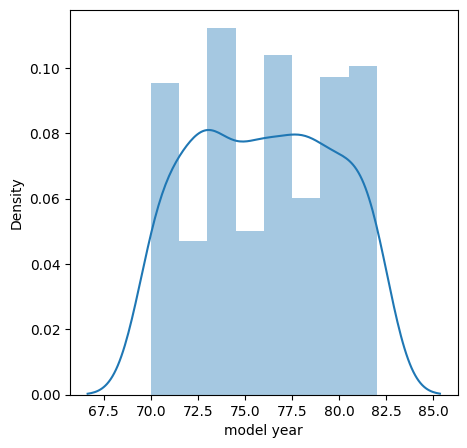

In [607]:
a=['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year']
for i in a:
#     print(f"The dribution graph of {i}")
    plt.figure(figsize=(5,5))
    sns.distplot(X[i])

"displacement","horsepower","weight" columns are right skewed.It has little peakness towards right

"acceleration" is normally distributed

"model year" seems normal but wider at the center

"cylinders" has only certain values which repeating often

<Axes: xlabel='origin', ylabel='count'>

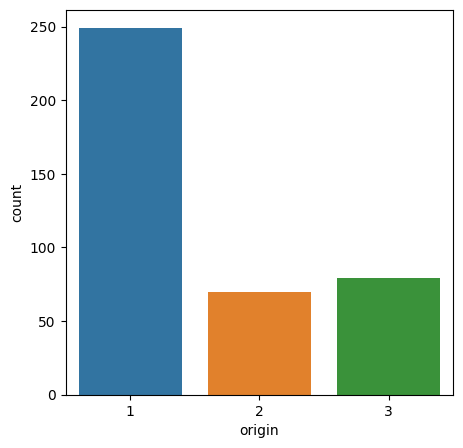

In [608]:
plt.figure(figsize=(5,5))
sns.countplot(x=X["origin"])

C:\Users\rajes\AppData\Local\Temp\ipykernel_11144\3842770894.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


<Axes: xlabel='mpg', ylabel='Density'>

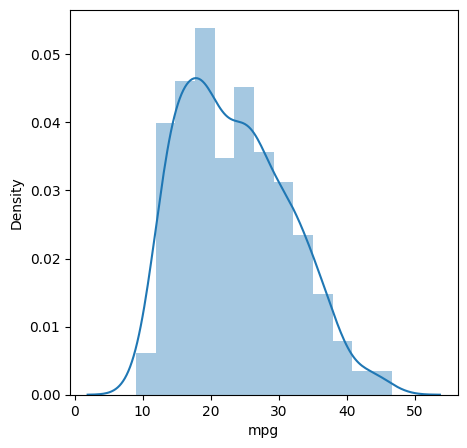

In [609]:
#Distribution of dependent Variable
plt.figure(figsize=(5,5))
sns.distplot(y)

In [610]:
#Little Skewness towards right

Splitting dataset into train test

In [611]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [612]:
X_train.shape,X_test.shape

((318, 7), (80, 7))

In [613]:
y_train.shape,y_test.shape

((318,), (80,))

In [614]:
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()

In [615]:
# X_train=sc.fit_transform(X_train)
# X_test=sc.transform(X_test)

### Simple Linear Regression

In [616]:
from sklearn.linear_model import LinearRegression

In [617]:
lin_reg=LinearRegression()

In [618]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [619]:
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(lin_reg,X_train,y_train,scoring="neg_mean_squared_error",cv=3)
np.mean(validation_score)

-12.589054315990003

In [620]:
lin_y_pred=lin_reg.predict(X_test)

In [621]:
#Metrics evaluation
#Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse1=mean_squared_error(y_train,lin_reg.predict(X_train))
mae1=mean_absolute_error(y_train,lin_reg.predict(X_train))
rmse1=np.sqrt(mse)
score1=r2_score(y_train,lin_reg.predict(X_train))
print("-"*15,"Performance Metrics of train data","-"*15)
print("mse of train data:",mse1)
print("mae of train data:",mae1)
print("rmse of train data:",rmse1)
print("score of train data:",score1)

print()

print("-"*15,"Performance Metrics of test data","-"*15)
mse=mean_squared_error(y_test,lin_y_pred)
mae=mean_absolute_error(y_test,lin_y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,lin_y_pred)
print("mse of test data:",mse)
print("mae of test data:",mae)
print("rmse of test data:",rmse)
print("score of test data:",score)

--------------- Performance Metrics of train data ---------------
mse of train data: 11.66037266832825
mae of train data: 2.598833396941471
rmse of train data: 3.39342573055325
score of train data: 0.8140179390257465

--------------- Performance Metrics of test data ---------------
mse of test data: 8.197746885824982
mae of test data: 2.255363261283571
rmse of test data: 2.863170774827269
score of test data: 0.8475304239212402


In [622]:
lin_reg.coef_

array([-0.15679336,  0.01422034, -0.0131871 , -0.00674638,  0.06877567,
        0.79495958,  1.32295917])

# 1.)Regularized Lasso Model

In [623]:
from sklearn.linear_model import Lasso

In [624]:
lasso=Lasso(alpha=5)

In [625]:
lasso.fit(X_train,y_train)

Lasso(alpha=5)

In [626]:
y_train_pred=lasso.predict(X_train)
y_test_pred=lasso.predict(X_test)

In [627]:
#Metrics evaluation
#Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse1=mean_squared_error(y_train,y_train_pred)
mae1=mean_absolute_error(y_train,y_train_pred)
rmse1=np.sqrt(mse)
score1=r2_score(y_train,y_train_pred)
print("-"*15,"Performance Metrics of train data","-"*15)
print("mse of train data:",mse1)
print("mae of train data:",mae1)
print("rmse of train data:",rmse1)
print("score of train data:",score1)

print()

print("-"*15,"Performance Metrics of test data","-"*15)
mse=mean_squared_error(y_test,y_test_pred)
mae=mean_absolute_error(y_test,y_test_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_test_pred)
print("mse of test data:",mse)
print("mae of test data:",mae)
print("rmse of test data:",rmse)
print("score of test data:",score)

--------------- Performance Metrics of train data ---------------
mse of train data: 14.54680426831343
mae of train data: 2.8434976430122387
rmse of train data: 2.863170774827269
score of train data: 0.7679795736067259

--------------- Performance Metrics of test data ---------------
mse of test data: 10.222202169106348
mae of test data: 2.5846119116696236
rmse of test data: 3.197217879517495
score of test data: 0.8098776587003423


In [628]:
from sklearn.metrics import r2_score
print("Score:", r2_score(y_train,y_train_pred))

Score: 0.7679795736067259


In [629]:
print("Score:", r2_score(y_test,y_test_pred))

Score: 0.8098776587003423


#### Hyperparameter tunning

In [630]:
from sklearn.model_selection import RandomizedSearchCV

In [631]:
model=Lasso()
param={"alpha":[1,2,3,5,10,20,25,100]}

In [632]:
lasso_model=RandomizedSearchCV(estimator=model,param_distributions=param,random_state=10,n_iter=5,cv=10,n_jobs=-1)

In [633]:
lasso_model.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=Lasso(), n_iter=5, n_jobs=-1,
                   param_distributions={'alpha': [1, 2, 3, 5, 10, 20, 25, 100]},
                   random_state=10)

In [634]:
lasso_model.best_params_

{'alpha': 1}

In [635]:
lasso_model.best_estimator_

Lasso(alpha=1)

In [636]:
lasso_model=Lasso(alpha=1)

In [637]:
lasso_model.fit(X_train,y_train)

Lasso(alpha=1)

In [638]:
#Metrics evaluation
#Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse1=mean_squared_error(y_train,lasso_model.predict(X_train))
mae1=mean_absolute_error(y_train,lasso_model.predict(X_train))
rmse1=np.sqrt(mse)
score1=r2_score(y_train,lasso_model.predict(X_train))
print("-"*15,"Performance Metrics of train data","-"*15)
print("mse of train data:",mse1)
print("mae of train data:",mae1)
print("rmse of train data:",rmse1)
print("score of train data:",score1)

print()

print("-"*15,"Performance Metrics of test data","-"*15)
mse=mean_squared_error(y_test,lasso_model.predict(X_test))
mae=mean_absolute_error(y_test,lasso_model.predict(X_test))
rmse=np.sqrt(mse)
score=r2_score(y_test,lasso_model.predict(X_test))
print("mse of test data:",mse)
print("mae of test data:",mae)
print("rmse of test data:",rmse)
print("score of test data:",score)

--------------- Performance Metrics of train data ---------------
mse of train data: 12.406733863509746
mae of train data: 2.6808655517301965
rmse of train data: 3.197217879517495
score of train data: 0.802113534487451

--------------- Performance Metrics of test data ---------------
mse of test data: 9.114224476573975
mae of test data: 2.423809755422371
rmse of test data: 3.018977389212111
score of test data: 0.8304848927901434


In [639]:
from sklearn.metrics import r2_score
print("Score:", r2_score(y_train,lasso_model.predict(X_train)))

Score: 0.802113534487451


In [640]:
print("Score:", r2_score(y_test,lasso_model.predict(X_test)))

Score: 0.8304848927901434


Before hyperparameter tuning, the R² score was 0.7679 for the training set and 0.8098 for the test set. After tuning, the R² score improved to 0.8021 for the training set and 0.8304 for the test set.

# 2.) Regularized Ridge Model

In [641]:
from sklearn.linear_model import Ridge

In [642]:
ridge=Ridge(alpha=5,solver='auto')

In [643]:
ridge.fit(X_train,y_train)

Ridge(alpha=5)

In [644]:
y_train_pred=ridge.predict(X_train)
y_test_pred=ridge.predict(X_test)

In [645]:
print("Score train dataset")
print("Score:", r2_score(y_train,y_train_pred))
print()
print("Score for Test dataset")
print("Score:", r2_score(y_test,y_test_pred))

Score train dataset
Score: 0.8139994113156637

Score for Test dataset
Score: 0.8470586459850817


In [646]:
#Metrics evaluation
#Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse1=mean_squared_error(y_train,ridge.predict(X_train))
mae1=mean_absolute_error(y_train,ridge.predict(X_train))
rmse1=np.sqrt(mse)
score1=r2_score(y_train,ridge.predict(X_train))
print("-"*15,"Performance Metrics of train data","-"*15)
print("mse of train data:",mse1)
print("mae of train data:",mae1)
print("rmse of train data:",rmse1)
print("score of train data:",score1)

print()

print("-"*15,"Performance Metrics of test data","-"*15)
mse=mean_squared_error(y_test,ridge.predict(X_test))
mae=mean_absolute_error(y_test,ridge.predict(X_test))
rmse=np.sqrt(mse)
score=r2_score(y_test,ridge.predict(X_test))
print("mse of test data:",mse)
print("mae of test data:",mae)
print("rmse of test data:",rmse)
print("score of test data:",score)

--------------- Performance Metrics of train data ---------------
mse of train data: 11.661534285761267
mae of train data: 2.598838858053553
rmse of train data: 3.018977389212111
score of train data: 0.8139994113156637

--------------- Performance Metrics of test data ---------------
mse of test data: 8.223112707691943
mae of test data: 2.257518976171828
rmse of test data: 2.867597026726723
score of test data: 0.8470586459850817


#### Hyperparameter tunning

In [647]:
from sklearn.model_selection import RandomizedSearchCV

In [648]:
model1=Ridge()
params={"alpha":[1,2,3,5,10,15,20,50,100],
       "solver":['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg','sag', 'saga', 'lbfgs']}

In [649]:
ridge_model=RandomizedSearchCV(
                                estimator=model1,
                                param_distributions=params,n_iter=10,cv=10,n_jobs=-1)

In [650]:
ridge_model.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
                   param_distributions={'alpha': [1, 2, 3, 5, 10, 15, 20, 50,
                                                  100],
                                        'solver': ['auto', 'svd', 'cholesky',
                                                   'lsqr', 'sparse_cg', 'sag',
                                                   'saga', 'lbfgs']})

In [651]:
ridge_model.best_params_

{'solver': 'lsqr', 'alpha': 15}

In [652]:
ridge_reg=Ridge(alpha=50,solver="auto")

In [653]:
ridge_reg.fit(X_train,y_train)

Ridge(alpha=50)

In [654]:
#Metrics evaluation
#Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse1=mean_squared_error(y_train,ridge_model.predict(X_train))
mae1=mean_absolute_error(y_train,ridge_model.predict(X_train))
rmse1=np.sqrt(mse)
score1=r2_score(y_train,ridge_model.predict(X_train))
print("-"*15,"Performance Metrics of train data","-"*15)
print("mse of train data:",mse1)
print("mae of train data:",mae1)
print("rmse of train data:",rmse1)
print("score of train data:",score1)

print()

print("-"*15,"Performance Metrics of test data","-"*15)
mse=mean_squared_error(y_test,ridge_model.predict(X_test))
mae=mean_absolute_error(y_test,ridge_model.predict(X_test))
rmse=np.sqrt(mse)
score=r2_score(y_test,ridge_model.predict(X_test))
print("mse of test data:",mse)
print("mae of test data:",mae)
print("rmse of test data:",rmse)
print("score of test data:",score)

--------------- Performance Metrics of train data ---------------
mse of train data: 11.676829710926684
mae of train data: 2.6001015731644452
rmse of train data: 2.867597026726723
score of train data: 0.8137554504426576

--------------- Performance Metrics of test data ---------------
mse of test data: 8.382133831158782
mae of test data: 2.270035944572743
rmse of test data: 2.8951915016383256
score of test data: 0.8441010182831967


# 3.) ElasticNet Regression

In [655]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [656]:
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
max_iter = [1000, 10000]
l1_ratio = np.arange(0.0, 1.0, 0.1)
tol = [0.5]

elasticnet_gscv = GridSearchCV(estimator=ElasticNet(), 
                                param_grid={'alpha': alpha,
                                            'max_iter': max_iter,
                                            'l1_ratio': l1_ratio,
                                            'tol':tol},   
                                scoring='r2',
                                cv=5)

In [657]:
elasticnet_gscv.fit(X, y)
elasticnet_gscv.best_params_

{'alpha': 1, 'l1_ratio': 0.0, 'max_iter': 1000, 'tol': 0.5}

In [658]:
elasticnet = ElasticNet(alpha = elasticnet_gscv.best_params_['alpha'], 
                        max_iter = elasticnet_gscv.best_params_['max_iter'],
                        l1_ratio = elasticnet_gscv.best_params_['l1_ratio'],
                        tol = elasticnet_gscv.best_params_['tol'])
elasticnet.fit(X_train, y_train)

ElasticNet(alpha=1, l1_ratio=0.0, tol=0.5)

In [659]:
mse1=mean_squared_error(y_train,elasticnet.predict(X_train))
mae1=mean_absolute_error(y_train,elasticnet.predict(X_train))
rmse1=np.sqrt(mse)
score1=r2_score(y_train,elasticnet.predict(X_train))
print("-"*15,"Performance Metrics of train data","-"*15)
print("mse of train data:",mse1)
print("mae of train data:",mae1)
print("rmse of train data:",rmse1)
print("score of train data:",score1)

print()

print("-"*15,"Performance Metrics of test data","-"*15)
mse=mean_squared_error(y_test,elasticnet.predict(X_test))
mae=mean_absolute_error(y_test,elasticnet.predict(X_test))
rmse=np.sqrt(mse)
score=r2_score(y_test,elasticnet.predict(X_test))
print("mse of test data:",mse)
print("mae of test data:",mae)
print("rmse of test data:",rmse)
print("score of test data:",score)

--------------- Performance Metrics of train data ---------------
mse of train data: 14.30925524769804
mae of train data: 2.8109974227123478
rmse of train data: 2.8951915016383256
score of train data: 0.7717684624950258

--------------- Performance Metrics of test data ---------------
mse of test data: 11.515338188780857
mae of test data: 2.655464489030063
rmse of test data: 3.39342573055325
score of test data: 0.7858266720721908


# ---------------Best model selection--------------------

In [660]:
# lin_reg=LinearRegression()
lasso_model = Lasso(alpha=1)
ridge_reg = Ridge(alpha=50, solver="auto")
elasticnet = ElasticNet(alpha = elasticnet_gscv.best_params_['alpha'], 
                        max_iter = elasticnet_gscv.best_params_['max_iter'],
                        l1_ratio = elasticnet_gscv.best_params_['l1_ratio'],
                        tol = elasticnet_gscv.best_params_['tol'])
models = [lasso_model, ridge_reg, elasticnet]

In [661]:
train_scores = {}
test_scores = {}

for model in models:
    model.fit(X_train,y_train)
    
            # Performance Metrics on Training Data
    mse_train = mean_squared_error(y_train, model.predict(X_train))
    mae_train = mean_absolute_error(y_train, model.predict(X_train))
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, model.predict(X_train))
    train_scores[model.__class__.__name__] = r2_train

    print("-" * 15, f"Performance Metrics of '{model.__class__.__name__}' on Train Data", "-" * 15)
    print()
        
    print(f"Performance Metrics of  Train Data", "-" * 15)
    print("MSE of train data:",mse_train)
    print("MAE of train data:", mae_train)
    print("RMSE of train data:", rmse_train)
    print("R² score of train data:", r2_train)
      
    print()
        
        # Performance Metrics on Test Data
    mse_test = mean_squared_error(y_test, model.predict(X_test))
    mae_test = mean_absolute_error(y_test, model.predict(X_test))
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, model.predict(X_test))
    test_scores[model.__class__.__name__] = r2_test
        
    print(f"Performance Metrics of  Test Data", "-" * 15)
    print("MSE of test data:", mse_test)
    print("MAE of test data:", mae_test)
    print("RMSE of test data:", rmse_test)
    print("R² score of test data:", r2_test)
    print()

best_train_model = max(train_scores, key=train_scores.get)
best_test_model = max(test_scores, key=test_scores.get)

print()

print(f"The model with the highest R² score on training data is '{best_train_model}' with a score of {train_scores[best_train_model]}")
print(f"The model with the highest R² score on test data is '{best_test_model}' with a score of {test_scores[best_test_model]}")

--------------- Performance Metrics of 'Lasso' on Train Data ---------------

Performance Metrics of  Train Data ---------------
MSE of train data: 12.406733863509746
MAE of train data: 2.6808655517301965
RMSE of train data: 3.5223193869252896
R² score of train data: 0.802113534487451

Performance Metrics of  Test Data ---------------
MSE of test data: 9.114224476573975
MAE of test data: 2.423809755422371
RMSE of test data: 3.018977389212111
R² score of test data: 0.8304848927901434

--------------- Performance Metrics of 'Ridge' on Train Data ---------------

Performance Metrics of  Train Data ---------------
MSE of train data: 11.720747443841901
MAE of train data: 2.6054254805940227
RMSE of train data: 3.4235577173230043
R² score of train data: 0.8130549659287214

Performance Metrics of  Test Data ---------------
MSE of test data: 8.40550265759872
MAE of test data: 2.2871315535904073
RMSE of test data: 2.8992244924459922
R² score of test data: 0.8436663823874586

--------------- Perf

### We will use polynomial features to understand ridge and lasso better

In [662]:
from sklearn.preprocessing import PolynomialFeatures

In [663]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

def poly_reg(X_train, X_test, y_train, y_test, degree):
    # Polynomial transformation
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Define models
    lin_reg=LinearRegression()
    lasso_model = Lasso(alpha=1)
    ridge_reg = Ridge(alpha=50, solver="auto")
    elasticnet = ElasticNet(alpha = elasticnet_gscv.best_params_['alpha'], 
                        max_iter = elasticnet_gscv.best_params_['max_iter'],
                        l1_ratio = elasticnet_gscv.best_params_['l1_ratio'],
                        tol = elasticnet_gscv.best_params_['tol'])
    models = [lin_reg,lasso_model, ridge_reg,elasticnet]
    
    for model in models:
        # Train the model
        model.fit(X_train_poly, y_train)
        
        # Performance Metrics on Training Data
        mse_train = mean_squared_error(y_train, model.predict(X_train_poly))
        mae_train = mean_absolute_error(y_train, model.predict(X_train_poly))
        rmse_train = np.sqrt(mse_train)
        r2_train = r2_score(y_train, model.predict(X_train_poly))
        print("-" * 15, f"Performance Metrics of {model.__class__.__name__} on Train Data", "-" * 15)
        
        print(f"Performance Metrics of  Train Data", "-" * 15)
        print("MSE of train data:", mse_train)
        print("MAE of train data:", mae_train)
        print("RMSE of train data:", rmse_train)
        print("R² score of train data:", r2_train)
        
        print()
        
        # Performance Metrics on Test Data
        mse_test = mean_squared_error(y_test, model.predict(X_test_poly))
        mae_test = mean_absolute_error(y_test, model.predict(X_test_poly))
        rmse_test = np.sqrt(mse_test)
        r2_test = r2_score(y_test, model.predict(X_test_poly))
        
        print(f"Performance Metrics of  Test Data", "-" * 15)
        print("MSE of test data:", mse_test)
        print("MAE of test data:", mae_test)
        print("RMSE of test data:", rmse_test)
        print("R² score of test data:", r2_test)
        print()

# Example usage
# X_train, X_test, y_train, y_test should be your datasets
# poly_reg(X_train, X_test, y_train, y_test, degree=2)


In [664]:
poly_reg(X_train,X_test,y_train,y_test,2)

--------------- Performance Metrics of LinearRegression on Train Data ---------------
Performance Metrics of  Train Data ---------------
MSE of train data: 6.794804568364591
MAE of train data: 1.9100929627048564
RMSE of train data: 2.606684593188173
R² score of train data: 0.8916233817316837

Performance Metrics of  Test Data ---------------
MSE of test data: 6.016961640639593
MAE of test data: 1.846687521231361
RMSE of test data: 2.4529495797181795
R² score of test data: 0.8880907640345919

--------------- Performance Metrics of Lasso on Train Data ---------------
Performance Metrics of  Train Data ---------------
MSE of train data: 8.001509615389057
MAE of train data: 2.0457337537603104
RMSE of train data: 2.828693976977548
R² score of train data: 0.8723765276201315

Performance Metrics of  Test Data ---------------
MSE of test data: 5.64783430540092
MAE of test data: 1.7505559151100687
RMSE of test data: 2.3765172638550136
R² score of test data: 0.894956149012535

--------------- Pe

C:\Users\rajes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.287e+03, tolerance: 1.994e+00
  model = cd_fast.enet_coordinate_descent(


In [665]:
poly_reg(X_train,X_test,y_train,y_test,3)

--------------- Performance Metrics of LinearRegression on Train Data ---------------
Performance Metrics of  Train Data ---------------
MSE of train data: 3.833305580202474
MAE of train data: 1.4411669937540326
RMSE of train data: 1.9578829332221255
R² score of train data: 0.9388590663069798

Performance Metrics of  Test Data ---------------
MSE of test data: 14.091711690835377
MAE of test data: 2.337777715050911
RMSE of test data: 3.753892871518229
R² score of test data: 0.73790880132675

--------------- Performance Metrics of Lasso on Train Data ---------------
Performance Metrics of  Train Data ---------------
MSE of train data: 6.749300028166176
MAE of train data: 1.8899510233674293
RMSE of train data: 2.5979414982185753
R² score of train data: 0.8923491757016118

Performance Metrics of  Test Data ---------------
MSE of test data: 5.388455541804497
MAE of test data: 1.7569632920055749
RMSE of test data: 2.32130470679842
R² score of test data: 0.8997803245671331

--------------- Pe

C:\Users\rajes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.096e+03, tolerance: 1.994e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\rajes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.31197e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Performance Metrics of  Test Data ---------------
MSE of test data: 6.984159484315836
MAE of test data: 2.08434679457665
RMSE of test data: 2.6427560395003993
R² score of test data: 0.8701018888883489

